In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

import pickle as pkl

import sys

sys.path.append('../../helper_classes')
from limit_utils import get_sensitivity_bands

2025-06-30 06:21:53.115472: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751289713.130828 1547558 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751289713.135159 1547558 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751289713.149177 1547558 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1751289713.149188 1547558 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1751289713.149190 1547558 computation_placer.cc:177] computation placer alr

In [2]:
def get_signal_rates_from_likelihood(likelihood_file):
    sys.path.append('..')
    likelihood_class = __import__('create_simple_template_likelihood', globals(), locals(), [])
    class_names = [name for name in dir(likelihood_class) if isinstance(getattr(likelihood_class, name), type)]
    globals().update({name: getattr(likelihood_class, name) for name in class_names})
    
    likelihood_container = pkl.load(open(likelihood_file, 'rb'))
    signal_expected_mean = likelihood_container.expected_signal_counts
    
    return signal_expected_mean

In [3]:
def scaling_fn(mu, mu_ref):
    return mu / mu_ref * (1e-12)**2

In [4]:
def get_bands(exposure='600ty'):
    signal_expected_mean = get_signal_rates_from_likelihood(f'likelihoods/HP_60t_{exposure}.pkl')

    masses, bands = get_sensitivity_bands(directory=f'outputs/HP_60t_{exposure}',
                                          scaling_fn=scaling_fn,
                                          signal_name='HP',
                                          signal_expected_mean=signal_expected_mean,
                                          inference_config=f'inference_configs/default.ini')

    return masses, bands

In [5]:
all_bands = dict()
all_exposures = ['100ty', '300ty', '600ty', '1000ty']

for exposure in all_exposures:
    masses, bands = get_bands(exposure=exposure)
    all_bands[exposure] = bands

Found 86 failed toy for HP1; removing...
Found 86 failed toy for HP2; removing...
Found 9 failed toy for HP11; removing...
Found 96 failed toy for HP12; removing...
Found 265 failed toy for HP13; removing...
Found 384 failed toy for HP14; removing...
Found 5 failed toy for HP1; removing...
Found 5 failed toy for HP2; removing...
Found 8 failed toy for HP12; removing...
Found 103 failed toy for HP13; removing...
Found 251 failed toy for HP14; removing...
Found 1 failed toy for HP6; removing...
Found 36 failed toy for HP13; removing...
Found 175 failed toy for HP14; removing...
Found 12 failed toy for HP6; removing...
Found 7 failed toy for HP8; removing...
Found 2 failed toy for HP9; removing...
Found 15 failed toy for HP13; removing...
Found 97 failed toy for HP14; removing...


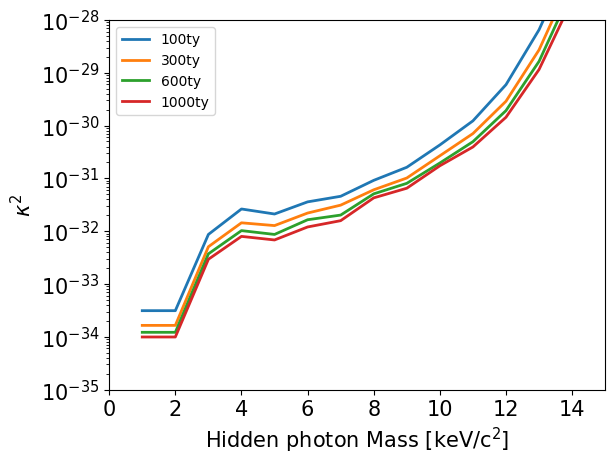

In [6]:
fig = plt.figure()
ax = fig.gca()

for exposure in all_exposures:
    these_bands = all_bands[exposure]

    plt.plot(masses, these_bands[0], lw=2., label=exposure)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

xlab = r'Hidden photon Mass [keV/c$^2$]'
xlim = (0, 15)

ylab = r'$\kappa^2$'
ylim = (1e-35, 1e-28)

ax.set_xlabel(xlab, fontsize=15)
ax.set_xlim(xlim)

ax.set_ylabel(ylab, fontsize=15)
ax.set_ylim(ylim)

ax.set_yscale('log')

plt.legend()